<a href="https://colab.research.google.com/github/Dexduo/Introducao-a-Ciencia-de-Dados/blob/main/Trabalho_Pratico_1/Trabalho_Pratico_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Classificação com Iris Dataset**

In [120]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error # erro quadratico médio para ser utilizado no calculo da precisão de regressão

In [87]:
iris = datasets.load_iris()
for key in iris.keys():
  print(key)

data
target
frame
target_names
DESCR
feature_names
filename
data_module


In [ ]:
X = iris.data
y = iris.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

**Usando KNN**

In [ ]:
neighbors_knn = KNeighborsClassifier(n_neighbors=3)
neighbors_knn.fit(X_train, y_train)
neighbors_pred_knn = neighbors_knn.predict(X_test)
print(accuracy_score(neighbors_pred_knn, y_test))

0.98


**Usando SVC**

In [ ]:
neighbors_svc = SVC()
neighbors_svc.fit(X_train, y_train)
neighbors_pred_svc = neighbors_svc.predict(X_test)
print(accuracy_score(neighbors_pred_svc, y_test))

1.0


In [ ]:
#Vamos ver agora com cross validation porém usando o StratifiedKFold para não ter o risco de separar treino e teste de forma desbalanceada ex.: de uma só classe

## **Regressão com Wine Quality Dataset**

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

In [ ]:
# fetch dataset
wine_quality = fetch_ucirepo(id=186)

In [ ]:
wine_data = wine_quality.data
#wine_data

In [123]:
# data (as pandas dataframes)
X_wine = wine_quality.data.features
y_wine = wine_quality.data.targets

In [ ]:
#X

In [ ]:
#y

In [ ]:
# metadata
#print(wine_quality.metadata)

In [ ]:
# variable information
#print(wine_quality.variables)

In [124]:
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size=0.33, random_state=42)

**Treino com Regressão Linear**

In [125]:
wine_linear_regression = LinearRegression().fit(X_train_wine, y_train_wine)

In [126]:
pred_wine_linear_regression = wine_linear_regression.predict(X_test_wine).astype(int)

In [128]:
print(mean_squared_error(y_test_wine, pred_wine_linear_regression, squared=True)) # podemos setar se queremos quadratico ou não

0.8396270396270397


Imagino que o modelo de Regressão Linear não soube lidar bem com múltiplas classes, poderíamos talvez utilizar técnica de one hot encoding para modificar os valores das classes.

**Treino com Random Forest Regression**

In [77]:
wine_rf_regression = RandomForestRegressor(max_depth=2, random_state=0).fit(X_train_wine, np.array(y_train['quality']))
#usei np array no y_train pegando a coluna quality pois o modelo requer apenas 1 dimensão

In [129]:
pred_wine_rf_regression = wine_rf_regression.predict(X_test_wine).astype(int)

In [130]:
print(mean_squared_error(y_test_wine, pred_wine_rf_regression, squared=True))

0.875990675990676


## **Classificação com Digits Dataset**

In [88]:
digits = datasets.load_digits()
for key in digits.keys():
  print(key)

data
target
frame
feature_names
target_names
images
DESCR


In [89]:
X = digits.data

In [90]:
y = digits.target

In [102]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [103]:
y

array([0, 1, 2, ..., 8, 9, 8])

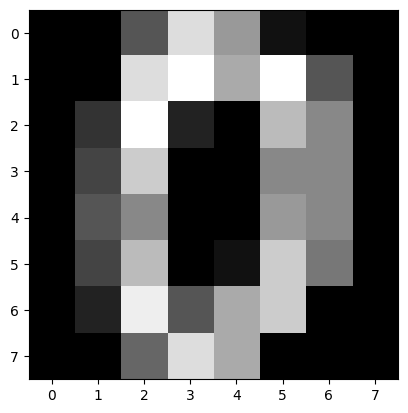

In [109]:
plt.imshow(digits.images[0], cmap='gray')

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Usando KNN**

In [114]:
neighbors_knn = KNeighborsClassifier(n_neighbors=10) #n_neighbors são 10 pois são 10 digitos: de 0 a 9
neighbors_knn.fit(X_train, y_train)
neighbors_pred_knn = neighbors_knn.predict(X_test)
print(accuracy_score(neighbors_pred_knn, y_test))

0.9831649831649831


**Usando SVC**

In [115]:
neighbors_svc = SVC()
neighbors_svc.fit(X_train, y_train)
neighbors_pred_svc = neighbors_svc.predict(X_test)
print(accuracy_score(neighbors_pred_svc, y_test))

0.9865319865319865
